In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("Principal Component Analysis.ipynb")

# Matrix Analysis 2024 - EE312
## Week 10 - Principal Component Analysis (PCA)
[LTS2](https://lts2.epfl.ch)

PCA is a classic technique for dimensionality reduction. As you will see in this notebook, this method uses  projections and eigenvalues.

## 1. Eigenvalues and PCA

Let us consider $N$ data points $\{x_k\}, k=1, ..., N$ in $\mathbb{R}^d$. During the rest of the exercise we will make the assumption that the mean value of these data points is 0, i.e. $\frac{1}{N}\sum_{k=1}^Nx_k=0$. We will denote by $X$ the $N\times d$ matrix s.t. :

$
X = \begin{pmatrix}
x_1^T\\
x_2^T\\ \vdots \\ x_N^T \end{pmatrix}$

<!-- BEGIN QUESTION -->

**1.1**
Write the projection of the data points $x_k$ on a unit-norm vector $u\in\mathbb{R}^d$ using a matrix operation

_Type your answer here, replacing this text._

The projection of $x_k$ on $u$ can be written as $<x_k, u>u$ (since $||u||=1$). Therefore the result of $Xu$ is a column vector containing the value of the projection of each $x_k$ on $u$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**1.2** Compute the variance of the projections of $x_k$ on $u$. **Reminder:** the variance of $\{b_k\}, k=1, ..., N$ is $\frac{1}{N}\sum_{k=1}^N||b_k - \bar{b}||^2$, where $\bar{b}$ is the mean value of the $b_k$.

The projection of $x_k$ on $u$ can be written as $<x_k, u>u$ (since $||u||=1$). Therefore the result of $Xu$ is a column vector containing the value of the projection of each $x_k$ on $u$.

_Type your answer here, replacing this text._

The average of the projections is $\overline{<x_k,u>} = \frac{1}{N}\sum_{k=1}^N <x_k, u>=\frac{1}{N}\sum_{k=1}^N\sum_{p=1}^d x_{kp}u_p = \frac{1}{N}\sum_{p=1}^d u_p\sum_{k=1}^N x_{kp} = <\bar{x}, u>$.

Since the $x_k$ have a mean $\bar{x}$ of 0, the variance is $\frac{1}{N}\sum_{k=1}^N ||<x_k, u> - <\bar{x}, u>||^2 = \frac{1}{N}\sum_{k=1}^N <x_k,u>^2 = \frac{1}{N}(Xu)^TXu = \frac{1}{N}u^TX^TXu$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**1.3** Let us define the matrix $C = \frac{1}{N}X^TX$ (referred to as the **sample covariance matrix** in the litterature). What are the properties of this matrix ? What is the implication on its eigenvalues ?

_Type your answer here, replacing this text._

$C$ is symmetric positive semi-definite, so its eigenvalues are real and  $\geq 0$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**1.4** PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. The following picture illustrate the principle for (blue) points in $\mathbb{R}^2$. Intuitively, the variance of the projected points (in red) will be maximized when the direction of projection matches the main direction of the point cloud in the picture.

![PCA](images/pca.gif)

We will now try to find a vector $u$, $||u||=1$, s.t. the variance of the projection of the data on this vector is maximal. Let us order the eigenvalues of $C$ in a decreasing order, i.e. $\lambda_1\geq \lambda_2\geq...\geq \lambda_d$. Show that the eigenvector associated with the largest eigenvalue maximizes the variance of the projection of $x_k$. This will be the first vector used for the first principal component. (Hint: consider the orthonormal basis formed by the eigenvectors of $C$).

_Type your answer here, replacing this text._

From the previous question, we have $\text{Var}(\{x_k\}) = u^TCu$. Without loss of generality we can use the coordinate system formed by the eigenvectors of $C$. In this basis, 
$C = \begin{pmatrix}\lambda_1 & 0 & ... & 0\\ 0 & \lambda_2 & ... & 0 \\  &  & \ddots & \\ 0 & 0& ... & \lambda_d \end{pmatrix}$, therefore $\text{Var}(\{x_k\}) = \sum_{p=1}^d \lambda_pu_p^2\leq \lambda_1 \sum_{p=1}^du_p^2$. As we have $||u||=1$, this upper bound is achieved for $u = u_1 =\begin{pmatrix}1\\0\\0\\ \vdots \\ 0\end{pmatrix}$. Since we made the assumption of using the coordinate system defined by the eigenvectors of $C$, the vector $u$ that maximizes the variance of the projection is the eigenvector associated with the largest eigenvalue.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**1.5** What is the second vector that will maximize the variance of the $x_k$ minus their projection on the first principal component vector (i.e. eigenvector associated to $\lambda_1$) ?

_Type your answer here, replacing this text._

We can use a reasoning similar to the previous question, if we are in the basis formed by the eigenvectors of $C$, the coordinates of the residuals will have the component associated with $u_1$ equal to 0. The variance of the residual can be written as $\sum_{p=2}^d\lambda_pu_p^2\leq \lambda_2\sum_{p=2}^du_p^2$, and the upper bound is then reached at $u = u_2 =\begin{pmatrix}0\\1\\0\\ \vdots \\ 0\end{pmatrix}$

<!-- END QUESTION -->

## 2. Applying PCA to data

After completing the previous part, you probably figured that PCA is achieved by iterating projections of residuals on eigenvectors of the covariance matrix. In this exercise, you will apply the PCA to a specific dataset.

**Warning** Computing the eigenvectors and eigenvalues can take time (> 1 minute) and is too slow on noto. Use either a local installation or [google colab](https://colab.research.google.com/)

### 2.1 Loading the dataset
The ["Olivetti faces dataset"](https://scikit-learn.org/stable/datasets/real_world.html?highlight=olivetti) is made of 400 64x64 images (represented as vectors containing 4096 elements). The dataset is made of pictures of 40 persons, with varying light conditions, facial expressions etc.

In [2]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
faces, labels = fetch_olivetti_faces(return_X_y=True, shuffle=True)

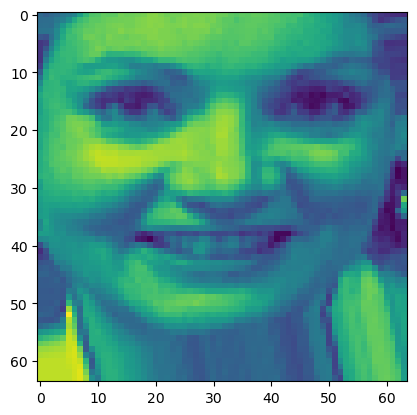

In [4]:
plt.imshow(np.reshape(faces[2,:], (64,64)))

The first step to perform the PCA is to remove the mean value from the input:

In [15]:
def remove_mean(input_data):
    """
    Compute the mean vector of the dataset and subtract it

    Parameters
    ----------
    input_data : input data matrix
   
    Returns
    -------
    0-centered input data
    """
    # BEGIN SOLUTION
    return input_data - np.mean(input_data, axis=0)
    # END SOLUTION

In [28]:
faces_zero_centered = remove_mean(faces) # SOLUTION

In [ ]:
grader.check("q2p1")

### 2.2 Covariance matrix
As seen in the theoretical part, you need compute the covariance matrix $C$ and compute its eigenvalues and eigenvectors (use the [numpy.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) function). Using the [argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) function, sort the eigenvalues and eigenvectors appropriately (do not trust Numpy's `eigh` documentation !). Be careful, `argsort` sorts in ascending order only, do not forget to reverse the array !



In [30]:
def covariance_sorted_eigv(X):
    """
    Computes the covariance matrix and return its sorted eigenvectors/eigenvalues in decreasing order

    Parameters
    ----------
    X : zero-centered input data
   
    Returns
    -------
    The sorted eigenvectors and eigenvalues of the covariance matrix of X 
    """
    # BEGIN SOLUTION
    C = X.T@X/X.shape[0]
    eig_vals, eig_vecs = np.linalg.eigh(C)
    sort_idx = np.argsort(eig_vals)[::-1]
    sorted_eigen_vals = eig_vals[sort_idx]
    sorted_eigen_vecs = eig_vecs[:, sort_idx]
    # END SOLUTION
    return sorted_eigen_vals, sorted_eigen_vecs

In [59]:
sorted_eigen_vals, sorted_eigen_vecs = covariance_sorted_eigv(faces_zero_centered)

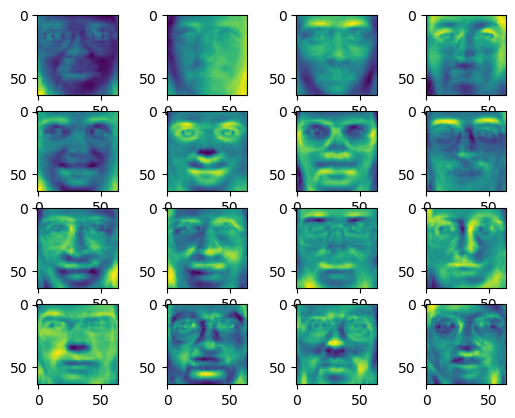

In [60]:
# Display the eigenvectors associated with the largest eigenvalues
# BEGIN SOLUTION
nrows = 4
ncols = 4
for k in range(nrows*ncols):
    plt.subplot(nrows, ncols, k+1)
    plt.imshow(np.reshape(sorted_eigen_vecs[:, k], (64, 64)))
# END SOLUTION

In [ ]:
grader.check("q2p2")

<!-- BEGIN QUESTION -->

### 2.3 PCA 
We are finally ready to write a function that performs a PCA, i.e. given an input data vector, returns its projection on the $n$ largest eigenvectors (implement the `pca` function). For a given input image, compute an approximation using $n$ principal components (in the `pca_approx` function). How many components (approximately) do you need to have a result that is close to the original image ?

In [54]:
def pca(input_vec, sorted_eig_vectors, n):
    """
    Compute the projection on the n largest eigenvectors

    Parameters
    ----------
    input_vec : input data vector
    sorted_eig_vectors: sorted eigenvectors of the covariance matrix
   
    Returns
    -------
    The projection of input_vec on each eigen vector
    """
    # BEGIN SOLUTION
    W = sorted_eig_vectors[:, 0:n]
    return input_vec@W
    # END SOLUTION

In [55]:
def pca_approx(pca_projection, sorted_eig_vectors, n):
    """
    Compute the PCA approximation

    Parameters
    ----------
    pca_projection : projection of input data vector on the covariance matrix egigenvectors
    sorted_eig_vectors: sorted eigenvectors of the covariance matrix
   
    Returns
    -------
    The projection of input_vec on each eigenv vector
    """
    # BEGIN SOLUTION
    return sorted_eig_vectors[:, :n]@pca_projection
    # END SOLUTION

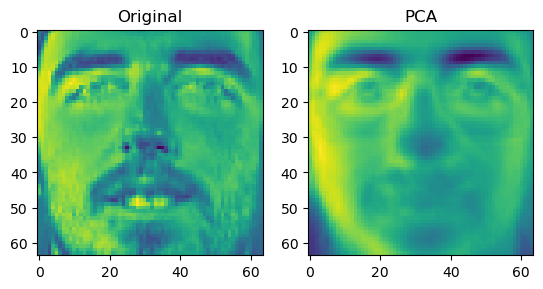

In [66]:
n = 10 # update this number
img = faces_zero_centered[40, :] # try other images too
approx = pca_approx(pca(img, sorted_eigen_vecs, n), sorted_eigen_vecs, n) # SOLUTION
ax = plt.subplot(121)
plt.imshow(np.reshape(img, (64, 64)))
ax.set_title('Original')
ax = plt.subplot(122)
plt.imshow(np.reshape(approx, (64, 64)))
ax.set_title('PCA')
plt.show()

Depending on the image, 100 to 200 components yield a good approximation of the initial image.

<!-- END QUESTION -->

## 3. PCA and SVD

Let us now study the relationship between PCA and SVD

<!-- BEGIN QUESTION -->

### 3.1 
Using the SVD of $X$, find a relationship between the eigenvalues/eigenvectors of $C$ and the singular values/singular vectors of $X$.

_Type your answer here, replacing this text._

$X=U\Sigma V^T$, therefore $X^TX = (U\Sigma V^T)^TU\Sigma V^T = V\Sigma U^TU\Sigma V^T$.

Since $U$ is orthogonal $U^TU=I$ and $X^TX = V\Sigma^2V^T$.

$\Sigma$ is a diagonal matrix, therefore so is $\Sigma^2$. This shows the eigenvalues $\lambda_i$ of $C$ are related to the singular values $\sigma_i$ by the following relationship: $\lambda_i = \frac{\sigma_i^2}{N}$, and the right singular vectors of $V$ are the eigenvectors of $C$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3.2
Check the [svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) function in Numpy and use it to compute the eigenvalues and eigenvectors of $C$ (use `full_matrices=False` to speed up computations). What is the interest of using SVD vs. computing explicitely $C$ and its eigenvalues/eigenvectors ?

_Type your answer here, replacing this text._

In [ ]:
def covariance_sorted_eigv_svd(X):
    """
    Computes the covariance matrix and return its sorted eigenvectors/eigenvalues in decreasing order using SVD

    Parameters
    ----------
    X : zero-centered input data
   
    Returns
    -------
    The sorted eigenvectors and eigenvalues of the covariance matrix of X 
    """
    # BEGIN SOLUTION
    u,s,vh = np.linalg.svd(faces_zero_centered, full_matrices=False)
    eigen_vals = s*s/400
    eigen_vecs = vh.T
    # END SOLUTION
    return sorted_eigen_vals, sorted_eigen_vecs

In [ ]:
svd_eigen_vals, svd_eigen_vec = covariance_sorted_eigv_svd(faces_zero_centered)

Regarding the interest, let us check computation times

In [69]:
# BEGIN SOLUTION
# be careful before running it !
# ca. 19s on google colab
%time eig_vals, eig_vecs = np.linalg.eigh(faces_zero_centered.T@faces_zero_centered)
# < 1s for full_matrices=False, ca. 4s otherwise on google colab
%time u,s,vh = np.linalg.svd(faces_zero_centered, full_matrices=False)
# END SOLUTION

CPU times: user 1min 37s, sys: 13.5 s, total: 1min 50s
Wall time: 12.8 s
CPU times: user 6.14 s, sys: 576 ms, total: 6.72 s
Wall time: 775 ms


We can see the SVD decomposition is 10 times (or more) faster.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3.3
Compute a low-rank $k\ll d$ approximation $X_k$ of $X$. You can plot the singular values to choose $k$. What is the relationship between $X_k$ and the PCA ?

_Type your answer here, replacing this text._

The rows of $X_k$ are an approximation of the input images, just like the PCA. In fact they are exactly the same. 

If we write the covariance matrix $C = V\Lambda V^T$ (as seen in question 3.1 $V$ is the same $V$ obtained when performing the SVD decomposition of $X$), with $\Lambda$ being a diagonal matrix, the full decomposition of $X$ on the principal components is $(XV)V^T$. Using the SVD, $X=U\Sigma V^T$, therefore $XV = U\Sigma$. If keep only $k$ components, the PCA approximation will be $(XV_k)V_k^T$ where $V_k$ is the matrix formed by the eigenvectors associated to the $k$ largest eigenvalues.

If we use the SVD of $X$, we can write $XV_k = U\Sigma V^TV_k$. $V_k$ is a "submatrix" of $V$, which is an orthogonal matrix. Therefore $V^TV_k$ will be a $d\times k$ matrix :

$V^TV_k = \begin{pmatrix}I_k\\ 0\end{pmatrix}$.

Therefore 
$\Sigma V^TV_k = 
\begin{pmatrix}
\sigma_1 & 0 & ... &0\\ 
0 & \sigma_2 & ... &0\\ 
  &  & \ddots & \\
  &  & & \sigma_k\\
0  &         & ...  & 0  \\
\vdots &    & & \vdots \\
0 & & ...& 0
  \end{pmatrix}$.
  
Therefore $U\Sigma V^TV_k$ will be a matrix containing the $k$ first column vectors of $U$ multiplied by the corresponding $\sigma_i$, i.e. $U_k\Sigma_k$. Finally, the PCA approximation can be written $U_k\Sigma_k V_k^T$ which corresponds to the low-rank approximation.

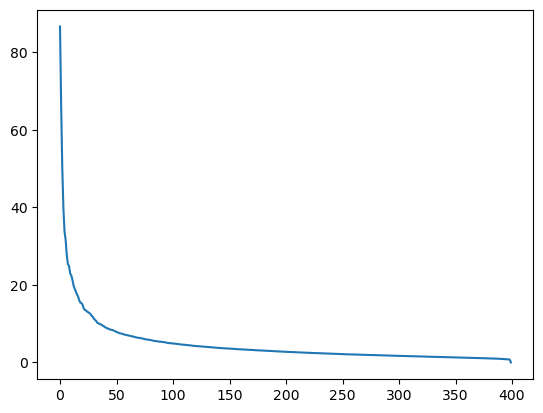

In [71]:
u,s,vh = np.linalg.svd(faces_zero_centered, full_matrices=False)
plt.plot(s)

In [73]:
def approx_low_rank(X, k):
    # BEGIN SOLUTION
    u,s,vh = np.linalg.svd(X, full_matrices=False)
    u_k = u[:, :k]
    s_k = s[:k]
    vh_k = vh[:k, :]
    X_k = u_k@np.diag(s_k)@vh_k
    return X_k
    # END SOLUTION

In [74]:
k=100 # SOLUTION # > ca. 100 to 150 seems a valid choice
X_k = approx_low_rank(faces_zero_centered, k)

<!-- END QUESTION -->



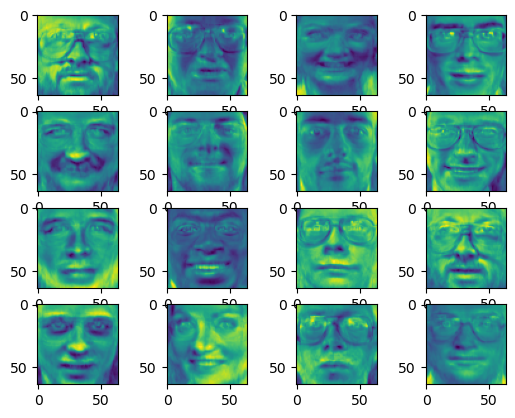

In [77]:
# Plot low-rank approximation
nrows = 4
ncols = 4
for k in range(nrows*ncols):
    plt.subplot(nrows, ncols, k+1)
    plt.imshow(np.reshape(X_k[k, :], (64, 64)))

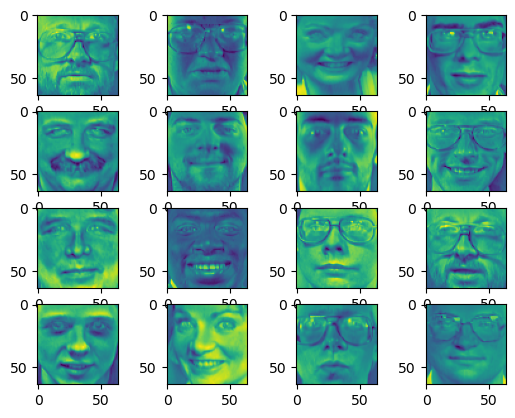

In [79]:
# compare witht the originals
nrows = 4
ncols = 4
for k in range(nrows*ncols):
    plt.subplot(nrows, ncols, k+1)
    plt.imshow(np.reshape(faces_zero_centered[k, :], (64, 64)))